In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import scipy.spatial
import json
from matplotlib import cm as CM
import sys

if './' not in sys.path:
    sys.path.append('./')
sys.path.append('/content/drive/MyDrive/PRML/code')
import warnings

from CSRnet_image import *
from CSRnet_model import *
from CSRnet_train import *
from CSRnet_utils import *
# from model import Net
import torch

%matplotlib inline

In [2]:
root = '/content/drive/MyDrive/PRML/'
part_A_train = os.path.join(root,'ShanghaiTech_crowd/part_A_final/train_data','images')
part_A_test = os.path.join(root,'ShanghaiTech_crowd/part_A_final/test_data','images')
part_B_train = os.path.join(root,'ShanghaiTech_crowd/part_B_final/train_data','images')
part_B_test = os.path.join(root,'ShanghaiTech_crowd/part_B_final/test_data','images')

path_sets = [part_B_test]

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

test_list = img_paths 

In [3]:
# plt.imshow(Image.open(img_paths[0]))

In [4]:
# gt_file = h5py.File(img_paths[0].replace('.jpg','.mat').replace('images','ground_truth'),'r')
# groundtruth = np.asarray(gt_file['density'])
# plt.imshow(groundtruth,cmap=CM.jet)

In [5]:
# np.sum(groundtruth)# don't mind this slight variation

In [ ]:
model = Net()
model = model.cuda()
checkpoint = torch.load(root+'save/B1_model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

In [22]:
print ('begin test')
test_loader = torch.utils.data.DataLoader(
dataset.listDataset(test_list,
                shuffle=False,
                transform=transforms.Compose([
                    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225]),
                ]),  train=False),
batch_size=batch_size)    

model.eval()

mae = 0

for i,(img, target) in enumerate(test_loader):
    img = img.cuda()
    img = Variable(img)
    output = model(img)
    
    mae += abs(output.data.sum()-target.sum().type(torch.FloatTensor).cuda())
    if(i%20==0):
      print(i,mae)
    
mae = mae/len(test_loader)    
print(' * MAE {mae:.3f} '
          .format(mae=mae))

begin test


/content/drive/MyDrive/PRML/code/CSRnet_image.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  gt_file = h5py.File(gt_path)


0 tensor(134.3084, device='cuda:0')
20 tensor(1810.3853, device='cuda:0')
40 tensor(3260.1333, device='cuda:0')
60 tensor(4937.6489, device='cuda:0')
80 tensor(7123.4644, device='cuda:0')
100 tensor(8724.5391, device='cuda:0')
120 tensor(10161.5312, device='cuda:0')
140 tensor(12062.1846, device='cuda:0')
160 tensor(13619.5303, device='cuda:0')
180 tensor(15594.5439, device='cuda:0')
 * MAE 88.232 


In [ ]:
i,(img,target) = list(enumerate(test_loader))[100]

In [70]:
img = img.cuda()
img = Variable(img)
output = model(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual :  192.6725616455078
Predicted :  220.24154663085938


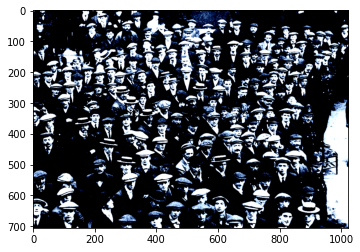

In [71]:
plt.imshow(img.cpu()[0].permute(1, 2, 0)) # normalized image
print("Actual : ",target.sum().type(torch.FloatTensor).cuda().item())
print("Predicted : ",output.data.sum().item())